<a href="https://colab.research.google.com/github/celefigs/collaborative_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [8]:
file_path = '../data/drugsComTrain.csv' 

drug_data_df=pd.read_csv(file_path)

drug_data_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
drug_data_df.shape 

(161297, 7)

In [10]:
drug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [11]:
#remove column "UniqueID"

drug_data_df=drug_data_df.drop(columns=['uniqueID'])

drug_data_df.head(2)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


In [12]:
#search related words in a "condition" column and create a new DataFrame with only the relevant conditions

pattern = r'birth|birth control|contraception|contraceptive methods|birth control pills|birth control devices|family planning'

filtered_df = drug_data_df[drug_data_df['condition'].str.contains(pattern, case=False, na=False)]

filtered_df.head()

,drugName,condition,review,rating,date,usefulCount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10


In [13]:
filtered_df.shape #reduce the rows in 129846

(31251, 6)

In [14]:
filtered_df.duplicated().sum() #if had---> drop dupl

0

In [15]:
#cuantas condiciones tenemos?

formatted_conditions = ', '.join(filtered_df['condition'].unique())

print(f"The related conditions are: {formatted_conditions}")

The related conditions are: Birth Control, Emergency Contraception


In [16]:
#buscar nan values

nan_values = filtered_df.isna().sum()

print(nan_values)

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [17]:
filtered_df.describe().T

# rating: 6,27 media;
# std	3.33-> means diversity;
# rating goes from 1 to 10; 

,count,mean,std,min,25%,50%,75%,max
rating,31251.0,6.274551,3.331740,1.0,3.0,7.0,9.0,10.0
usefulCount,31251.0,8.248824,17.665796,0.0,2.0,5.0,9.0,1247.0


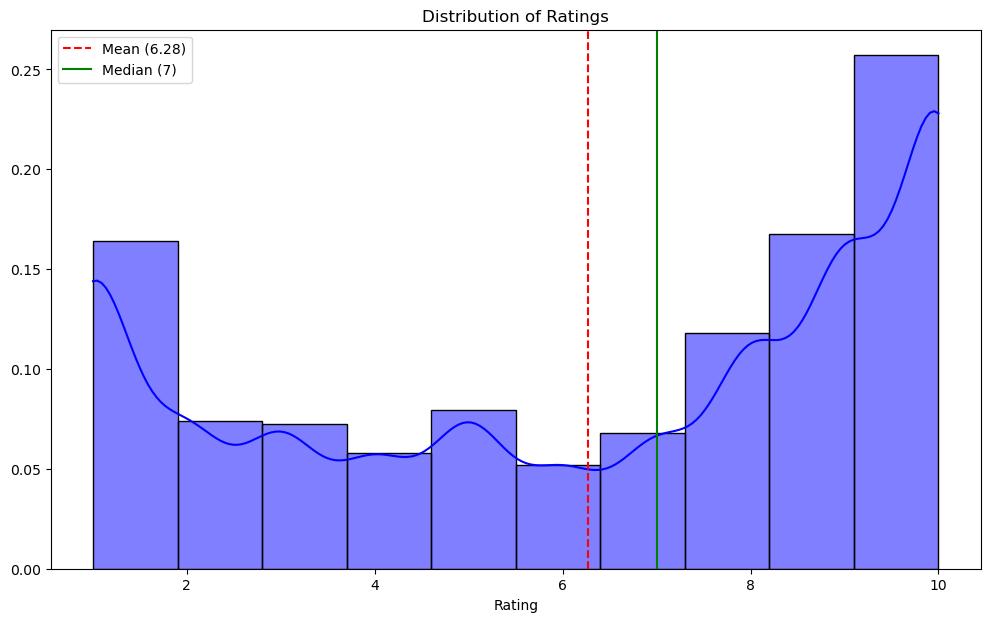

In [18]:
# Rating

plt.figure(figsize=(12, 7))

sns.histplot(filtered_df['rating'], bins=10, kde=True, color='blue', stat='density')

plt.axvline(x=filtered_df['rating'].mean(), color='red', linestyle='--', label='Mean (6.28)')
plt.axvline(x=filtered_df['rating'].median(), color='green', linestyle='-', label='Median (7)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('')
plt.legend()
#plt.grid()



## usefulCount

- Range goes from 0 to 1247, indicating that some reviews received a high number of useful votes while others were not considered useful at all.
- Approximately 3.96% of reviews are deemed useful
- 75% of reviews received 9 or fewer useful votes, indicating that many reviews fall within a lower utility range
- High variability in useful votes suggests that reviews are perceived quite differently; some receive numerous useful votes while others do not, reflecting differences in quality, relevance, or style.

#I didn't create a graph because it's hard for me to explain it

In [19]:
filtered_df.describe(exclude='number').T

,count,unique,top,freq
drugName,31251,182,Levonorgestrel,3350
condition,31251,2,Birth Control,28788
review,31251,19715,"""I began taking Mononesse April 28th 2015. I w...",4
date,31251,3085,22-Sep-15,48


## drugName vs rating


In [89]:
#top 5 drugName 

#top_5_used_drugs = filtered_df['drugName'].value_counts().sort_values(ascending=False).head(5)

top_5_used_drugs = filtered_df['drugName'].value_counts().nlargest(5)

top_5_used_drugs

drugName
Levonorgestrel                        3350
Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Ethinyl estradiol / levonorgestrel    1600
Name: count, dtype: int64

In [91]:
mean_rating_by_drugname = filtered_df.groupby('drugName')['rating'].mean().reset_index()



In [92]:
top_5_mean_ratings = mean_rating_by_drugname[mean_rating_by_drugname['drugName'].isin(top_5_used_drugs)]


In [93]:
top_5_mean_ratings


,drugName,rating


In [67]:
grupo_drug.first()

,condition,review,rating,date,usefulCount
drugName,,,,,
Aftera,Emergency Contraception,"""I had sex with my boyfriend and he came insid...",9,28-Sep-15,4
Alesse,Birth Control,"""Awesome""",10,23-Nov-15,0
Altavera,Birth Control,"""#1 it gave me acne. #2 I GAINED so much weigh...",1,30-Dec-15,4
Alyacen 1 / 35,Birth Control,"""After about a week of taking this, I woke up ...",2,29-Nov-17,0
Amethia,Birth Control,"""I&#039;m on the 10th week of my first 3 month...",9,1-May-17,0
...,...,...,...,...,...
Zenchent,Birth Control,"""I&#039;m so grateful I finally found this pil...",10,28-Sep-17,0
Zovia,Birth Control,"""I was on Beyaz before switching to Zovia. I s...",7,22-Dec-14,3
Zovia 1 / 35,Birth Control,"""This is my first birth control. When I first ...",9,16-May-12,3


In [70]:
grupo_drug.get_group('Levonorgestrel')

,drugName,condition,review,rating,date,usefulCount
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
83,Levonorgestrel,Birth Control,"""I had the Mirena put in almost a year ago. In...",1,18-Jan-10,10
113,Levonorgestrel,Birth Control,"""My time with skyla has been an absolute breez...",10,14-Jul-16,1
139,Levonorgestrel,Birth Control,"""I&#039;m 27 w/ two kids. After my second chil...",2,26-Jun-11,2
144,Levonorgestrel,Birth Control,"""Had the Liletta inserted in November. The pro...",3,24-May-17,4
...,...,...,...,...,...,...
161156,Levonorgestrel,Birth Control,"""I had Skyla placed in May. I have gained abou...",6,18-Sep-16,5
161161,Levonorgestrel,Emergency Contraception,"""I had unprotected sex August 29 which was a M...",10,16-Sep-16,15
161165,Levonorgestrel,Birth Control,"""I had my Mirena in for a year and half and ju...",2,6-Jan-11,3
161201,Levonorgestrel,Birth Control,"""I got the IUD a little over two months ago af...",9,14-Aug-16,7


In [77]:
grupo_drug_rating =filtered_df.groupby(['drugName', 'rating'])

In [78]:
grupo_drug_rating.first()

condition  \
drugName rating                            
Aftera   1       Emergency Contraception   
         3       Emergency Contraception   
         6       Emergency Contraception   
         7       Emergency Contraception   
         8       Emergency Contraception   
...                                  ...   
ella     6       Emergency Contraception   
         7       Emergency Contraception   
         8       Emergency Contraception   
         9       Emergency Contraception   
         10      Emergency Contraception   

                                                            review       date  \
drugName rating                                                                 
Aftera   1       "I bought this after having unprotected sex wi...   8-Aug-16   
         3                                       "I am so scared "   4-Nov-16   
         6       "Soo I have unprotected sex June 25 and immedi...  29-Jun-16   
         7       "Well we all know accidents happen and one nig...   8-Aug-15   
         8       "During unprotected sexual intercourse he full...   3-Sep-17   
...                                                            ...        ...   
ella     6       "I just wanted to share my experience in case ...   8-Dec-16   
         7       "I took the Ella pill maybe 17hrs after unprot...  22-Mar-16   
         8       "I tool the pill yesterday morning after unpro...   3-Jun-16   
         9       "Hey,\r\r\nSo I took the ellaOne about 7h afte...  13-Sep-16   
         10      "I used this after a condom split- was very wo...  12-Apr-17   

                 usefulCount  
drugName rating               
Aftera   1                 4  
         3                 4  
         6                 2  
         7                 4  
         8                10  
...                      ...  
ella     6                32  
         7                 4  
         8                 5  
         9                10  
         10                4  

[1205 rows x 4 columns]

In [55]:
filtered_df

,drugName,condition,review,rating,date,usefulCount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
...,...,...,...,...,...,...
161268,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,28-Jan-14,9
161269,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,20-Apr-15,13
161271,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,26-Jan-16,4
161273,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0


In [20]:
#Tokenization

import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('punkt_tab')

In [21]:
# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

In [22]:
def preprocess_function(reviews):

    #remove special characters
    reviews = re.sub(REPLACE_NO_SPACE, "", reviews)
    reviews = re.sub(REPLACE_WITH_SPACE, " ", reviews)

    tokens = word_tokenize(reviews)

    # lowercase and lemmatize
    lemmatizer = WordNetLemmatizer()

    lemmas = [lemmatizer.lemmatize(token.lower(), pos='n') for token in tokens]

    return lemmas

In [23]:
#sanity check

In [24]:
filtered_df['review'].iloc[0][1]

'I'

In [25]:
preprocess_function(filtered_df['review'].iloc[0][1])

['i']

In [26]:
filtered_df.review

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
6         "He pulled out, but he cummed a bit in me. I t...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
                                ...                        
161268    "I switched to Portia 12 days ago when I start...
161269    "When I first starting taking Lo Loestrin Fe, ...
161271    "My experience: Painful insertion but I expect...
161273    "I have had the Nexplanon since Dec. 27, 2016 ...
161291    "This would be my second month on Junel. I&#03...
Name: review, Length: 31251, dtype: object

In [27]:
# vectoriser = TfidfVectorizer(analyzer=preprocess_function)
# data_tfidf = vectoriser.fit_transform(filtered_df.review)

KeyboardInterrupt: 

In [22]:
df.drugName.nunique()

182

In [23]:
df[df['drugName'] == 'Nexplanon']


,Unnamed: 0.1,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
4,4,14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,etonogestrel,standard
12,12,75,109866,Nexplanon,Birth Control,"""I&#039;ve had mine for over a year and notice...",6,19-Jun-16,1,etonogestrel,standard
31,31,155,98258,Nexplanon,Birth Control,"""I&#039;ve had this implant for 7 months now, ...",4,4-Jun-15,4,etonogestrel,standard
41,41,199,109272,Nexplanon,Birth Control,"""Brief review due to character limit:\r\nInser...",4,10-Feb-17,3,etonogestrel,standard
43,43,218,109444,Nexplanon,Birth Control,"""I have had my Nexplanon implant in since earl...",7,17-Dec-16,6,etonogestrel,standard
...,...,...,...,...,...,...,...,...,...,...,...
31183,31183,161002,98658,Nexplanon,Birth Control,"""At first I was skeptical that it would not he...",10,14-Jan-14,1,etonogestrel,standard
31214,31214,161139,97874,Nexplanon,Birth Control,"""34 day in a row bleeding... Only had it for 2...",2,12-Oct-15,5,etonogestrel,standard
31227,31227,161186,98061,Nexplanon,Birth Control,"""I have had nexplanon since February of 2015, ...",5,29-Aug-15,5,etonogestrel,standard
31233,31233,161199,109172,Nexplanon,Birth Control,"""I had the implant inserted in late August of ...",3,17-Mar-17,2,etonogestrel,standard


In [25]:
df['matched_type'].unique()  #method of administration. It specifies whether the contraceptive is an oral pill, implant, intrauterine device (IUD), emergency contraceptive, or hormonal contraceptive patch.

#matched_type -> how the contraceptive is used or administered? 
# standard means pill?

array([nan, 'standard', 'Implantable rods', 'Intrauterine devices (IUD)',
       'emergency', 'Hormonal contraceptive patch'], dtype=object)